In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')

In [3]:
x = ["listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered",
     "neighborhood_overview", "notes","transit","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id",
    "host_url","host_name","host_since","host_location","host_about","host_thumbnail_url","host_picture_url",
    "host_neighbourhood","host_listings_count","host_total_listings_count","host_has_profile_pic","host_identity_verified",
    "street","neighbourhood","neighbourhood_cleansed","city","state","zipcode","market","smart_location","country_code",
    "country","is_location_exact","square_feet","weekly_price","monthly_price","security_deposit","cleaning_fee",
    "calendar_updated","has_availability","calendar_last_scraped","requires_license","license","jurisdiction_names",
     "instant_bookable","require_guest_profile_picture","require_guest_phone_verification","calculated_host_listings_count",
     "host_response_time", "first_review" , "last_review","reviews_per_month","host_verifications"]

listings = listings.drop(columns= x)


listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_response_rate'].fillna(listings['host_response_rate'].mean(),inplace = True)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean(),inplace = True)

listings['extra_people'] = listings['extra_people'].str.replace(",", "")
listings['extra_people'] = listings['extra_people'].str.replace("$", "").astype("float")

listings['price'] = listings['price'].str.replace(",", "")
listings['price'] = listings['price'].str.replace("$", "").astype("float")

listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])

reviewColumns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in reviewColumns:
    listings[column].fillna(listings[column].mean(), inplace = True)
    

listings['host_is_superhost'].replace('f', 0 ,inplace=True)
listings['host_is_superhost'].replace('t', 1 ,inplace=True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(0)
listings

,id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,96.000000,100.000000,0.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,moderate
1,953595,98.000000,100.000000,1.0,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
2,3308979,67.000000,100.000000,0.0,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
3,7421966,94.886798,99.967159,0.0,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,flexible
4,278830,100.000000,99.967159,0.0,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,99.000000,100.000000,0.0,Other neighborhoods,47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",359.0,1,0.0,3,1125,18,32,32,32,1,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000,strict
3814,8902327,100.000000,100.000000,0.0,Capitol Hill,47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",79.0,3,25.0,2,29,6,26,44,273,2,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,moderate
3815,10267360,94.886798,99.967159,0.0,Rainier Valley,47.508453,-122.240607,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",93.0,2,20.0,1,7,29,59,88,88,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,moderate
3816,9604740,100.000000,99.967159,0.0,Capitol Hill,47.632335,-122.275530,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",99.0,1,0.0,3,1125,30,60,90,179,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,moderate


# Exploratory Data Analysis

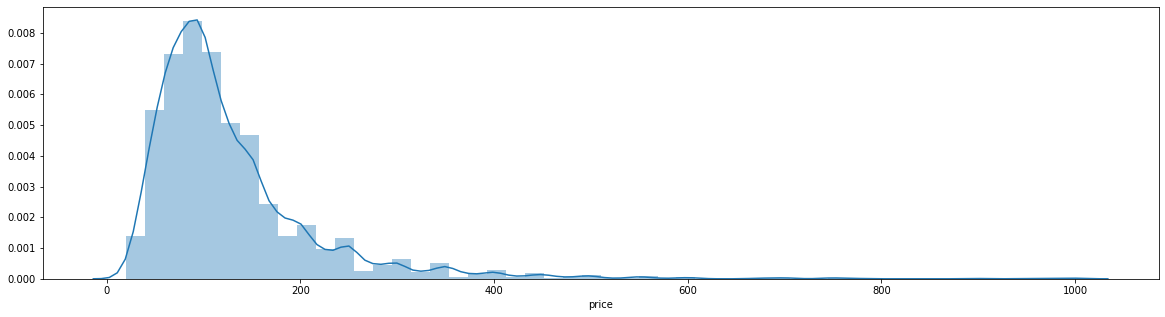

In [4]:
plt.figure(figsize=(20,5))
sb.distplot(listings["price"]);
plt.show()

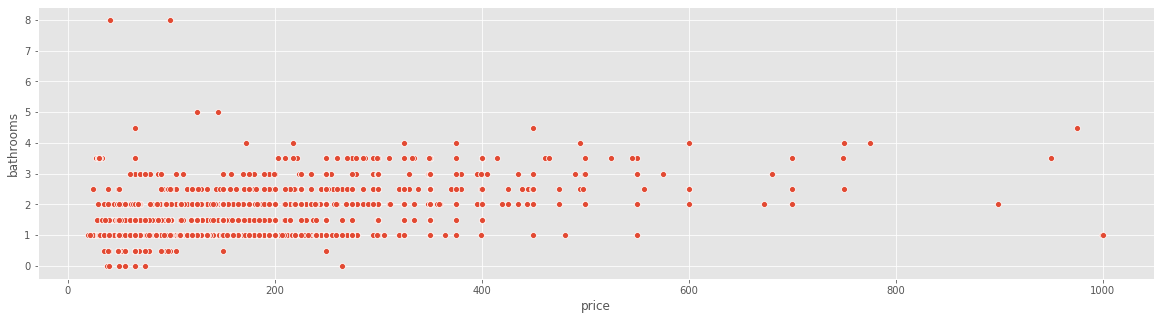

In [62]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bathrooms',data=listings)
plt.show()

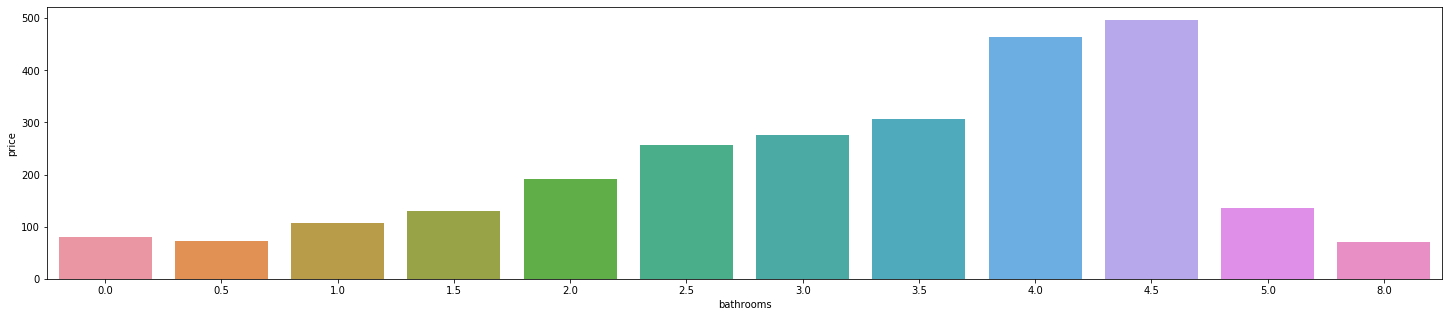

In [6]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bathrooms").mean()['price']).reset_index(), x = "bathrooms" , y = "price" )
plt.show()

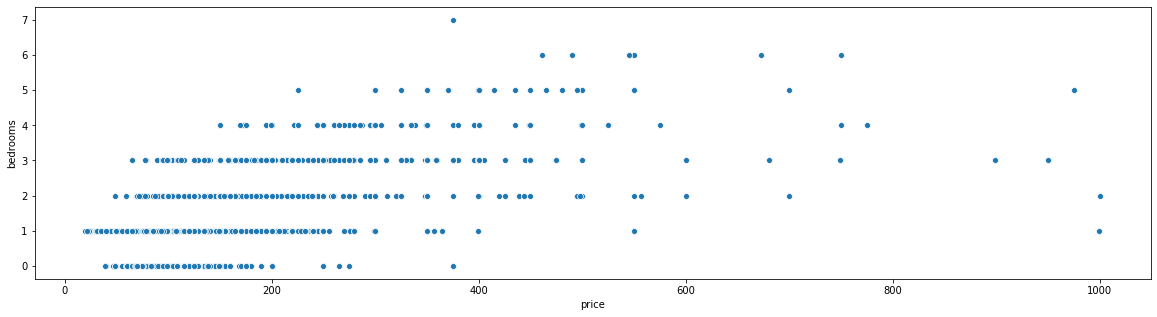

In [7]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bedrooms',data=listings)
plt.show()

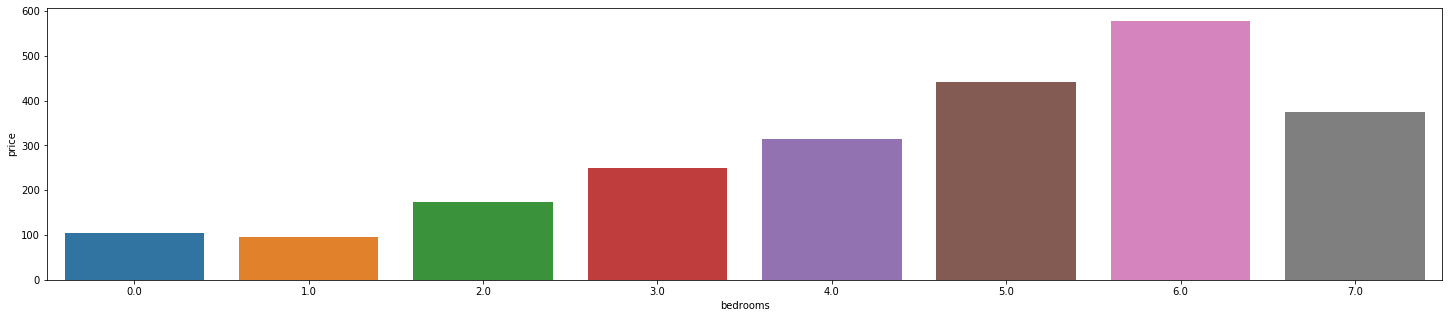

In [8]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bedrooms").mean()['price']).reset_index(), x = "bedrooms" , y = "price" )
plt.show()

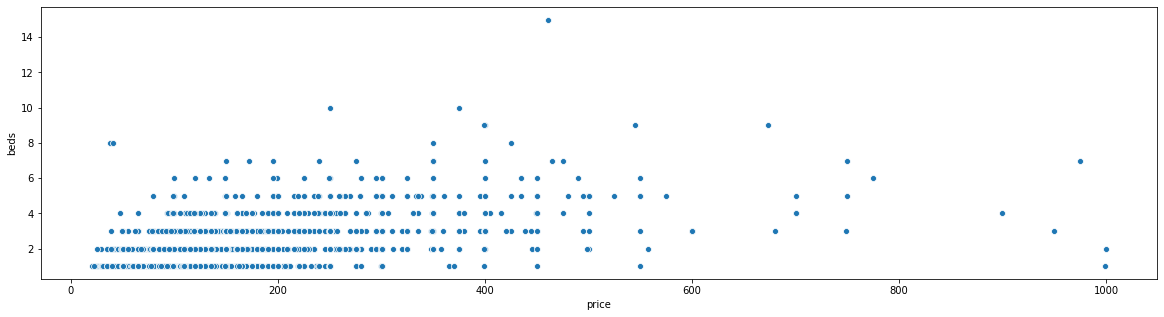

In [9]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='beds',data=listings)
plt.show()

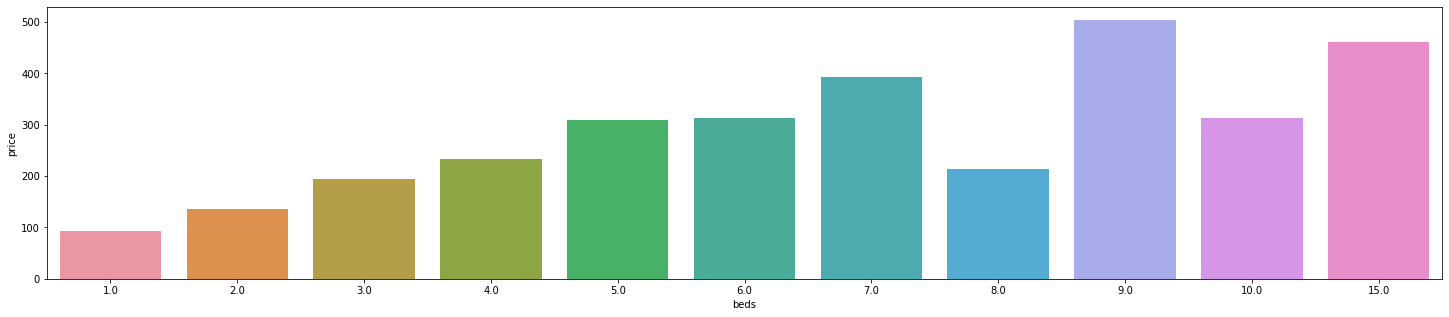

In [10]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame( listings.groupby("beds").mean()['price']).reset_index(), x = "beds" , y = "price" )
plt.show()

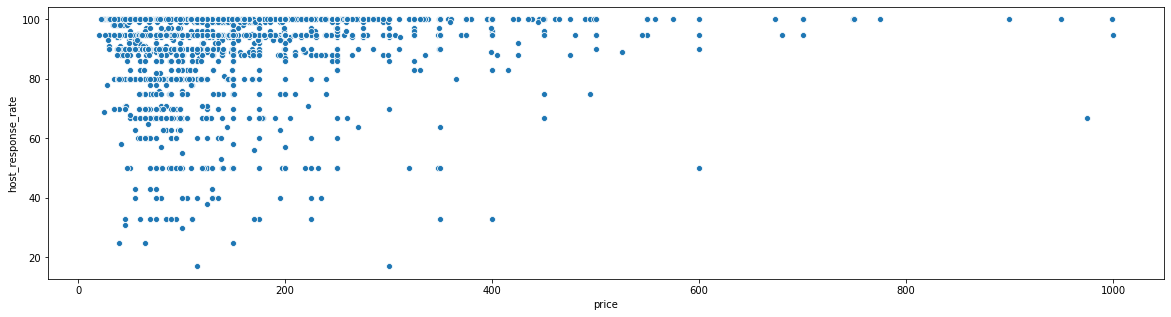

In [27]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_response_rate',data=listings)
plt.show()

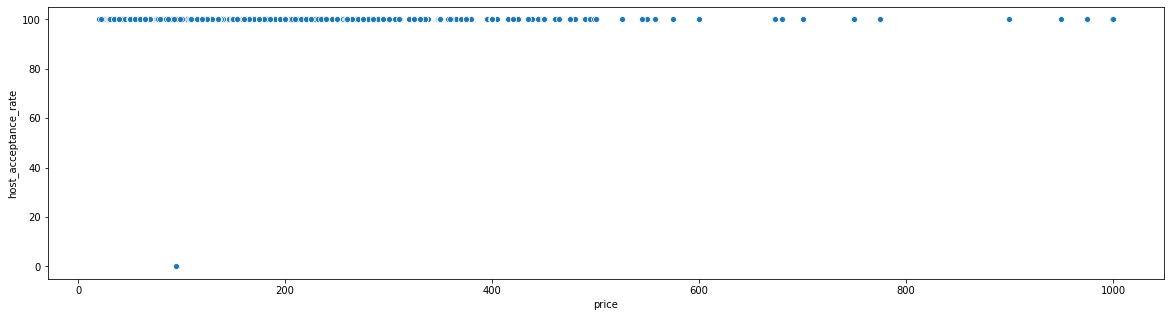

In [28]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_acceptance_rate',data=listings)
plt.show()

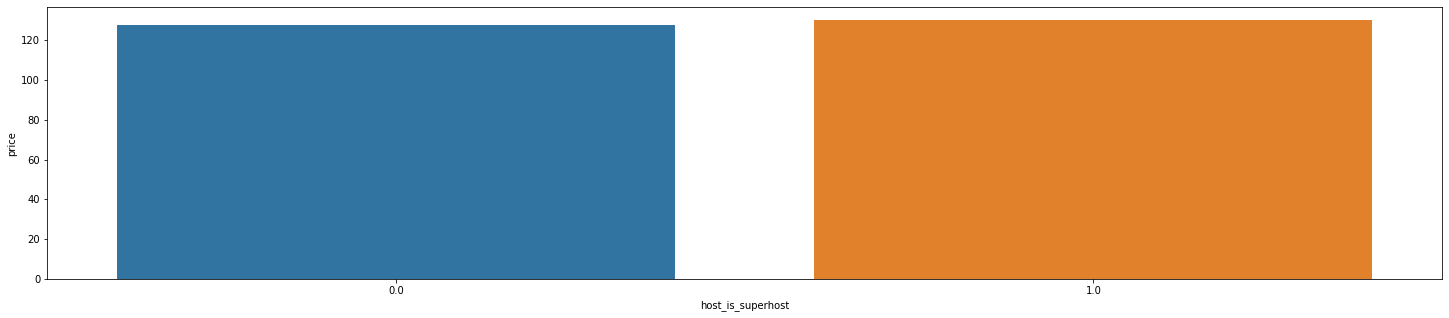

In [31]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("host_is_superhost").mean()['price']).reset_index(), x = "host_is_superhost" , y = "price" )
plt.show()

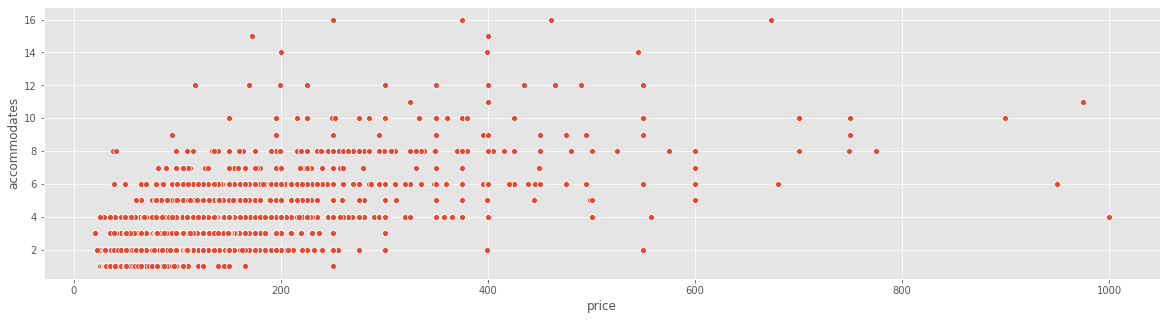

In [63]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='accommodates',data=listings)
plt.show()

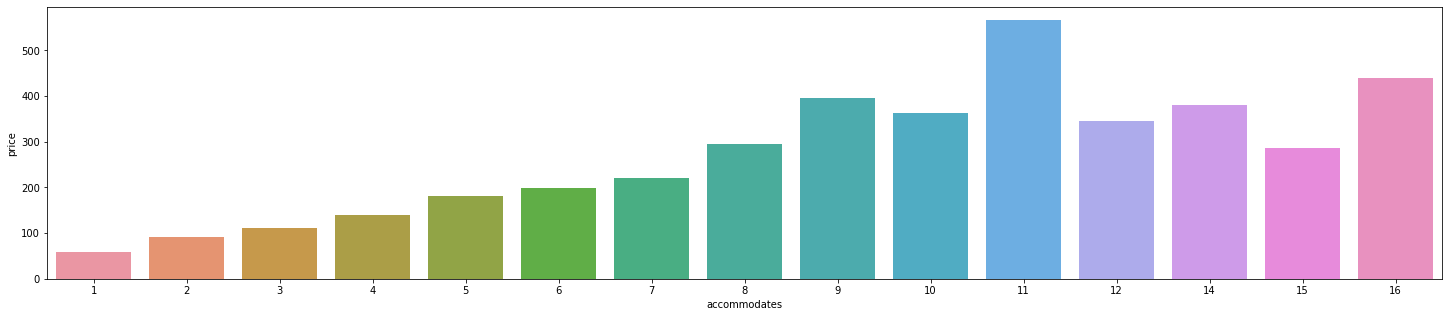

In [32]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("accommodates").mean()['price']).reset_index(), x = "accommodates" , y = "price" )
plt.show()

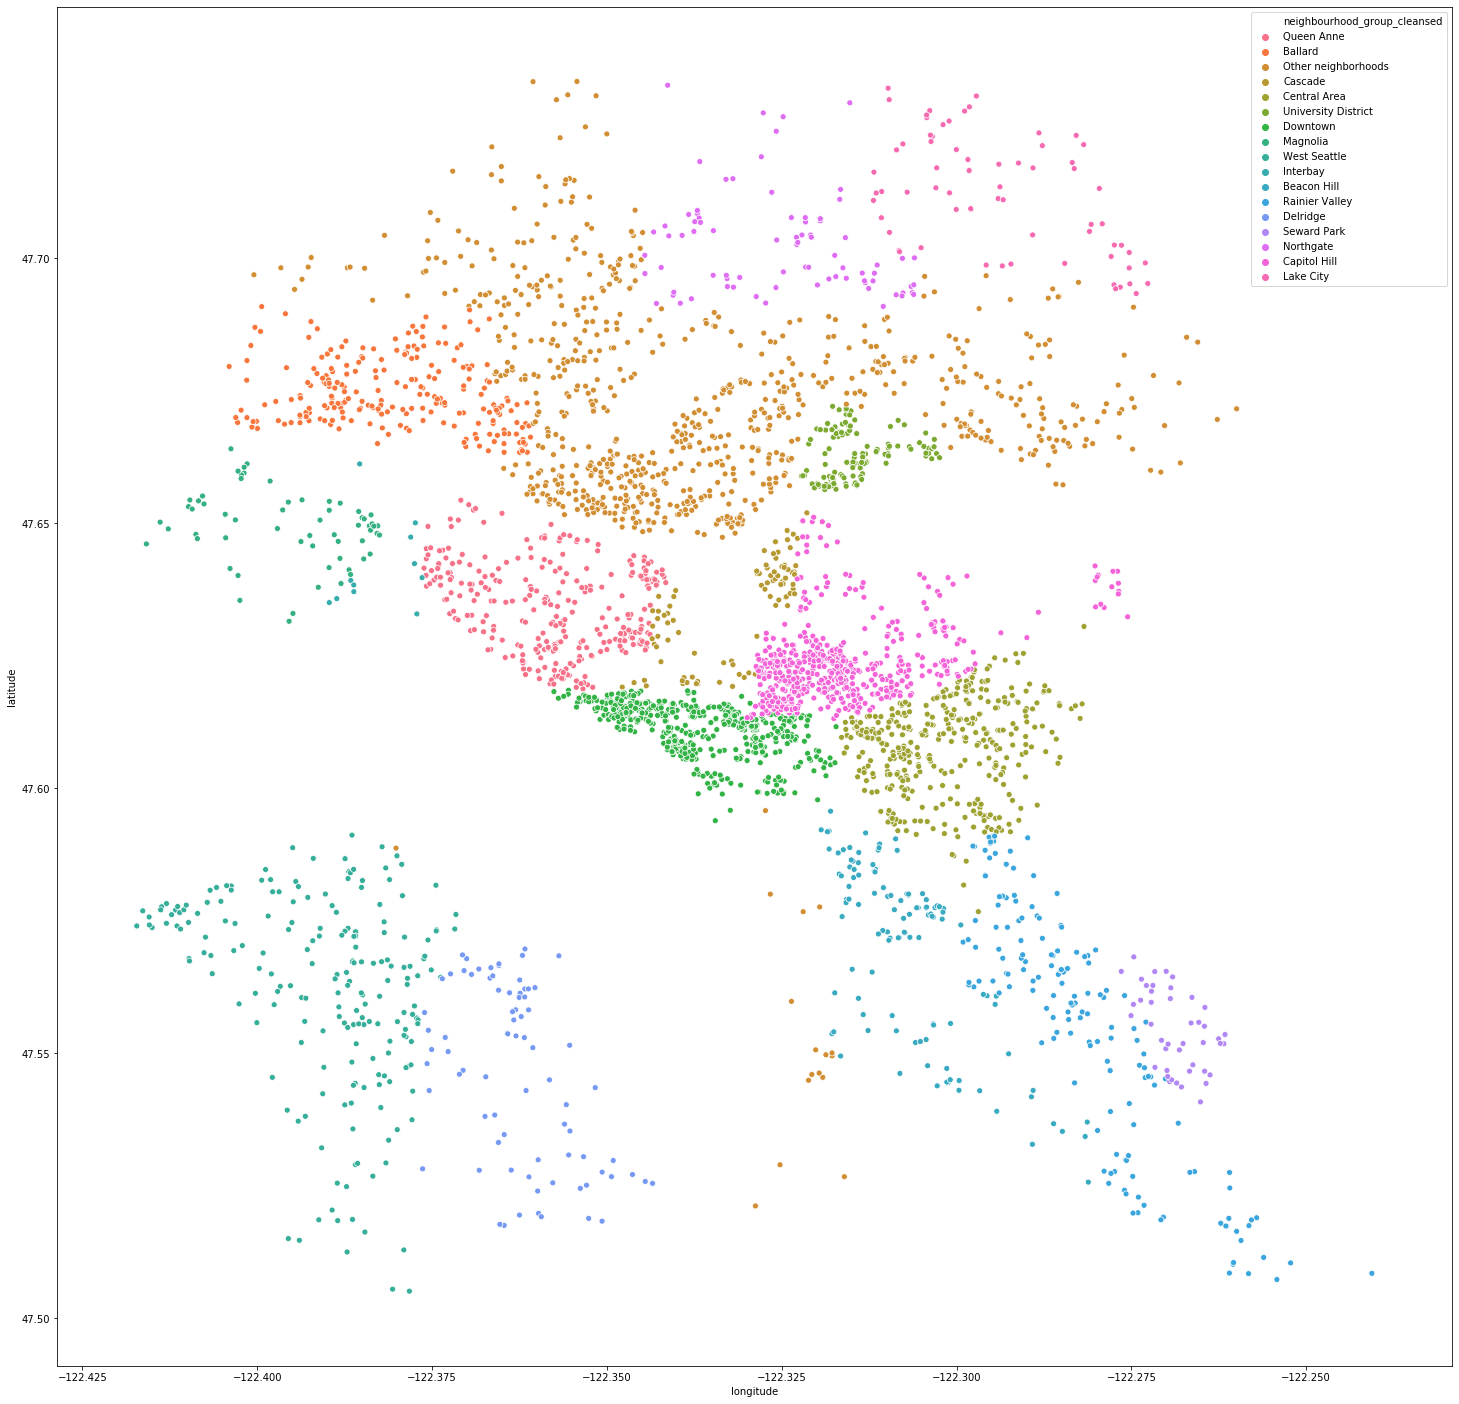

In [12]:
plt.figure(figsize=(25,25))
sb.scatterplot(listings["longitude"],listings["latitude"],hue=listings["neighbourhood_group_cleansed"])
plt.show()

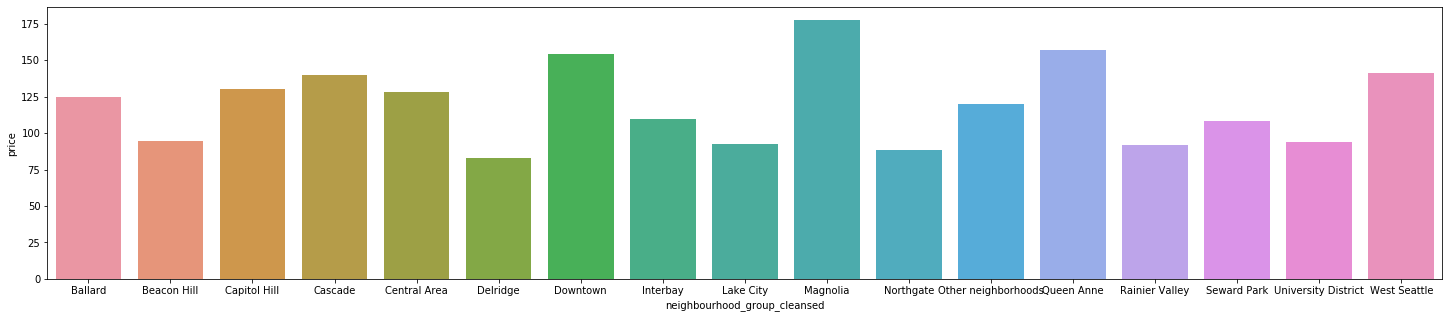

In [13]:
data_groupbyNeighbour = listings.groupby("neighbourhood_group_cleansed")
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(data_groupbyNeighbour.mean()["price"]).reset_index(), x = "neighbourhood_group_cleansed" , y = "price" )
plt.show()

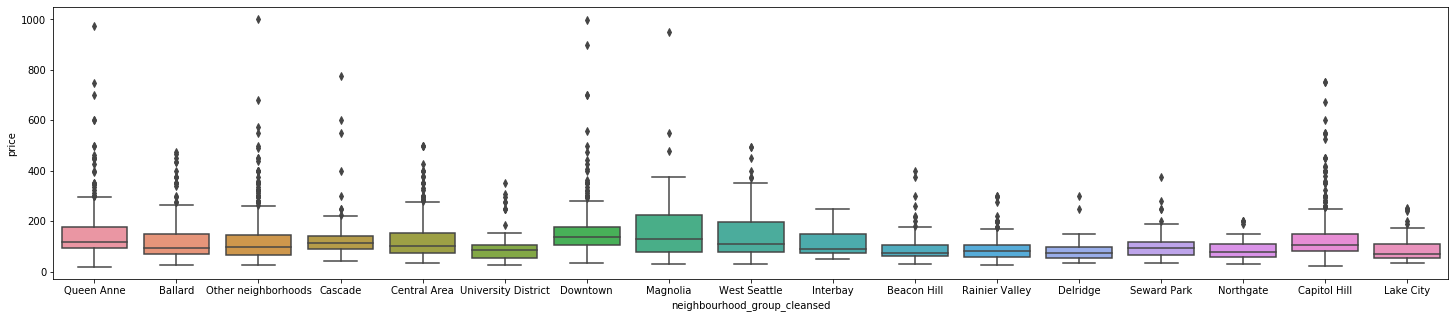

In [14]:
plt.figure(figsize=(25,5))
sb.boxplot(y="price",x ='neighbourhood_group_cleansed' ,data = listings)
plt.show()

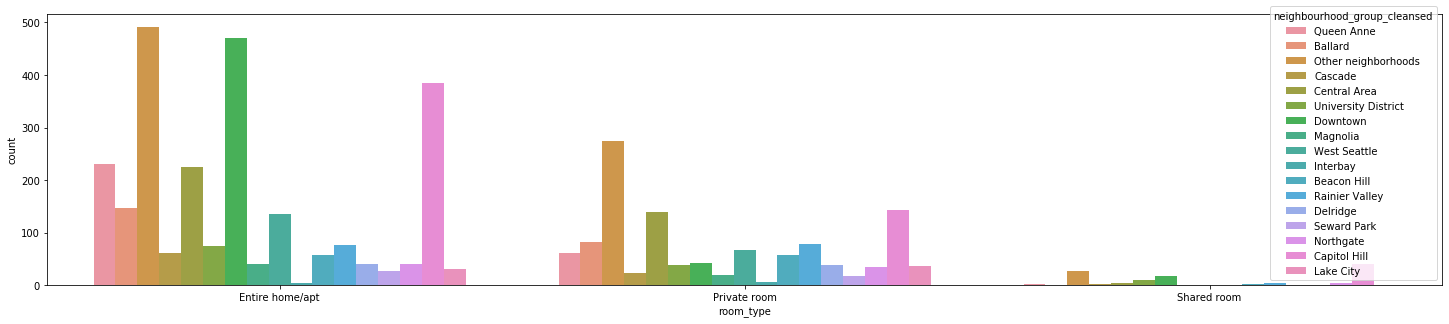

In [15]:
plt.figure(figsize=(25,5))
sb.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = listings)
plt.show()

<Figure size 1800x360 with 0 Axes>

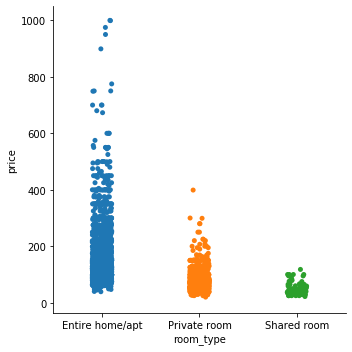

In [16]:
plt.figure(figsize=(25,5))
sb.catplot(x="room_type", y="price", data=listings);
plt.show()

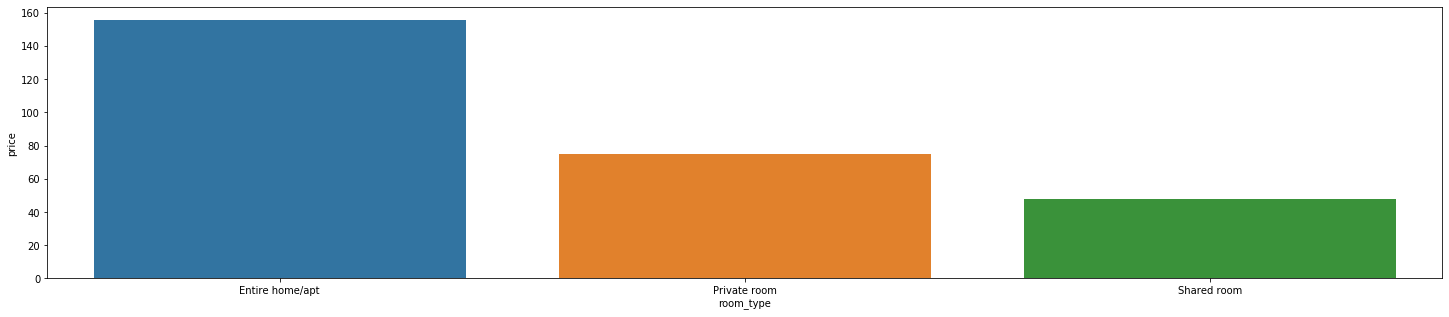

In [17]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("room_type").mean()['price']).reset_index(), x = "room_type" , y = "price" )
plt.show()

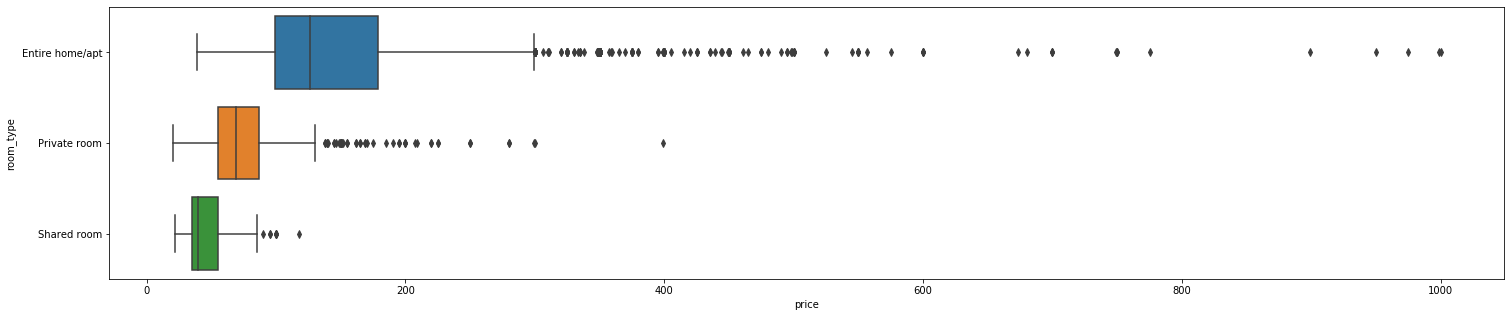

In [18]:
plt.figure(figsize=(25,5))
sb.boxplot(x="price",y ='room_type' ,data = listings)
plt.show()

# Prediction of Price

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Extract Response and Predictors
y = np.log1p(listings['price'])
x = listings[["bathrooms","bedrooms","neighbourhood_group_cleansed","room_type","host_response_rate" , "host_acceptance_rate" , "host_is_superhost" , "accommodates"]]

one_hot = pd.get_dummies(x['neighbourhood_group_cleansed'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['neighbourhood_group_cleansed'] , axis=1)

one_hot = pd.get_dummies(x['room_type'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['room_type'] , axis=1)
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_test_pred = linreg.predict(x_test)

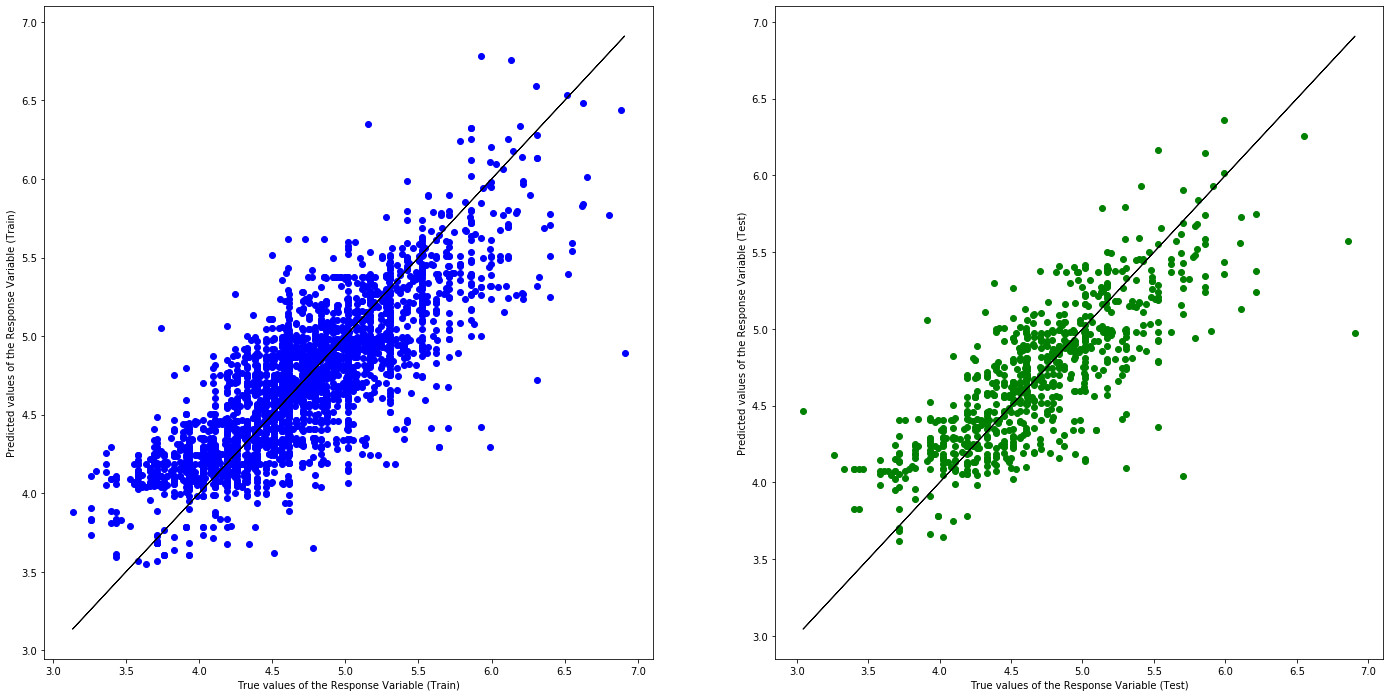

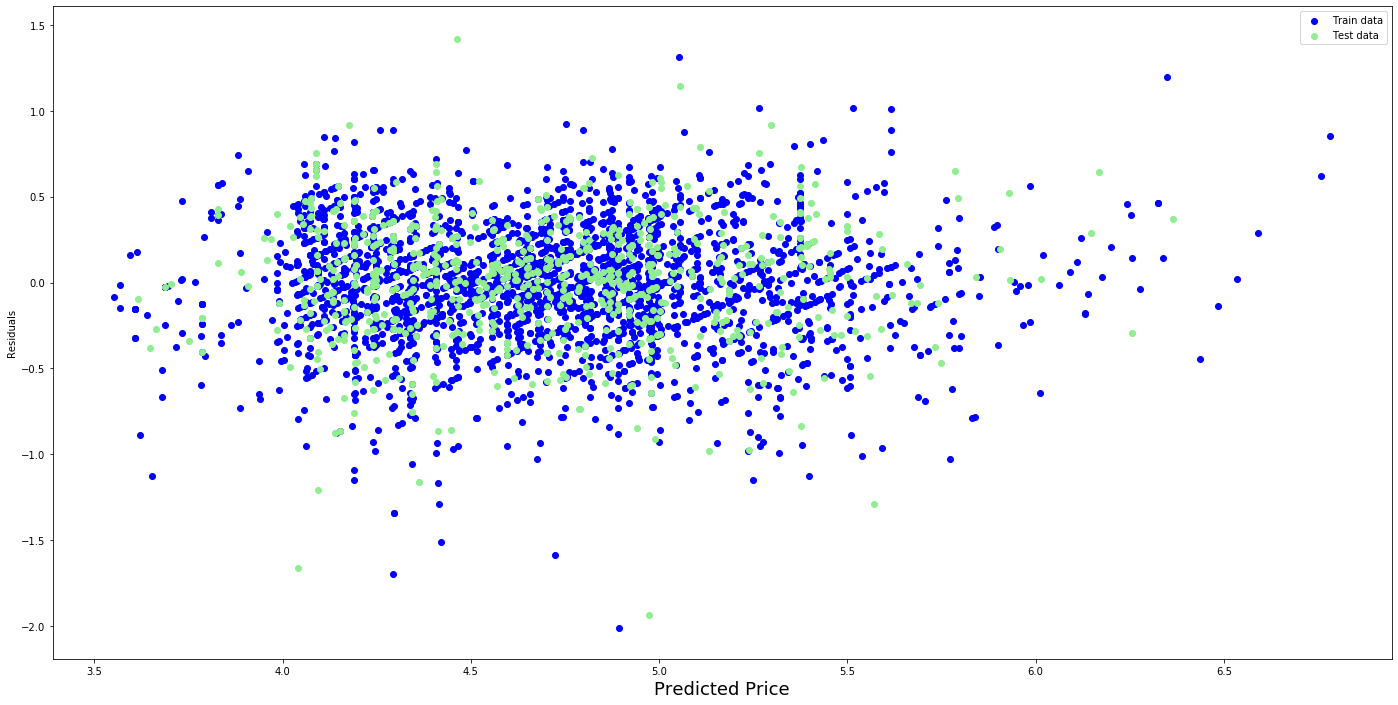

Explained Variance (R^2) on Train Set 	: 0.6601818165812031
Explained Variance (R^2) on Test Set 	: 0.6320666596879552


In [21]:
y_train_pred = linreg.predict(x_train)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price', fontsize=18)
plt.ylabel('Residuals')

plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))

# Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [23]:
rf= RandomForestRegressor(random_state=1, n_jobs=4, max_features='log2')

param_grid = dict(n_estimators=[3000,4000,5000],
                  max_depth=[None, 4],
                  min_samples_leaf=[1,2])

grid_rf =GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_rf.fit(x_train,y_train)


rf = grid_rf.best_estimator_

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)


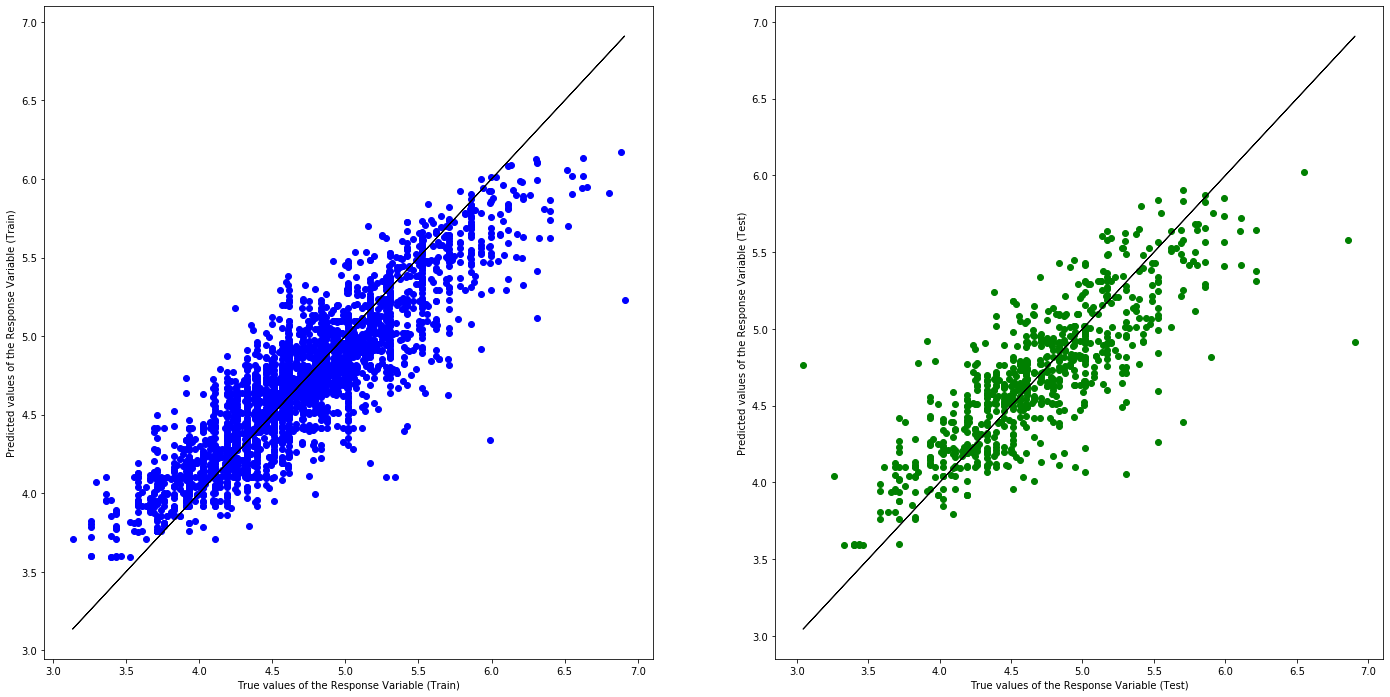

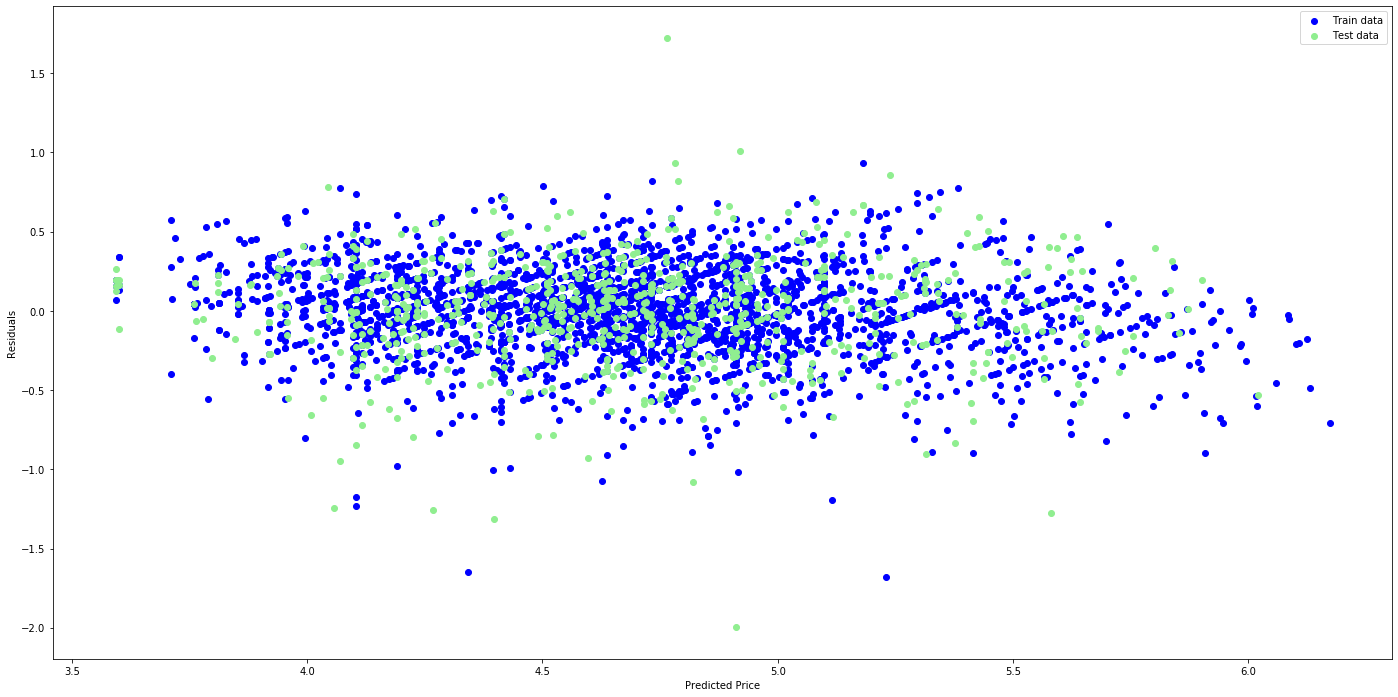

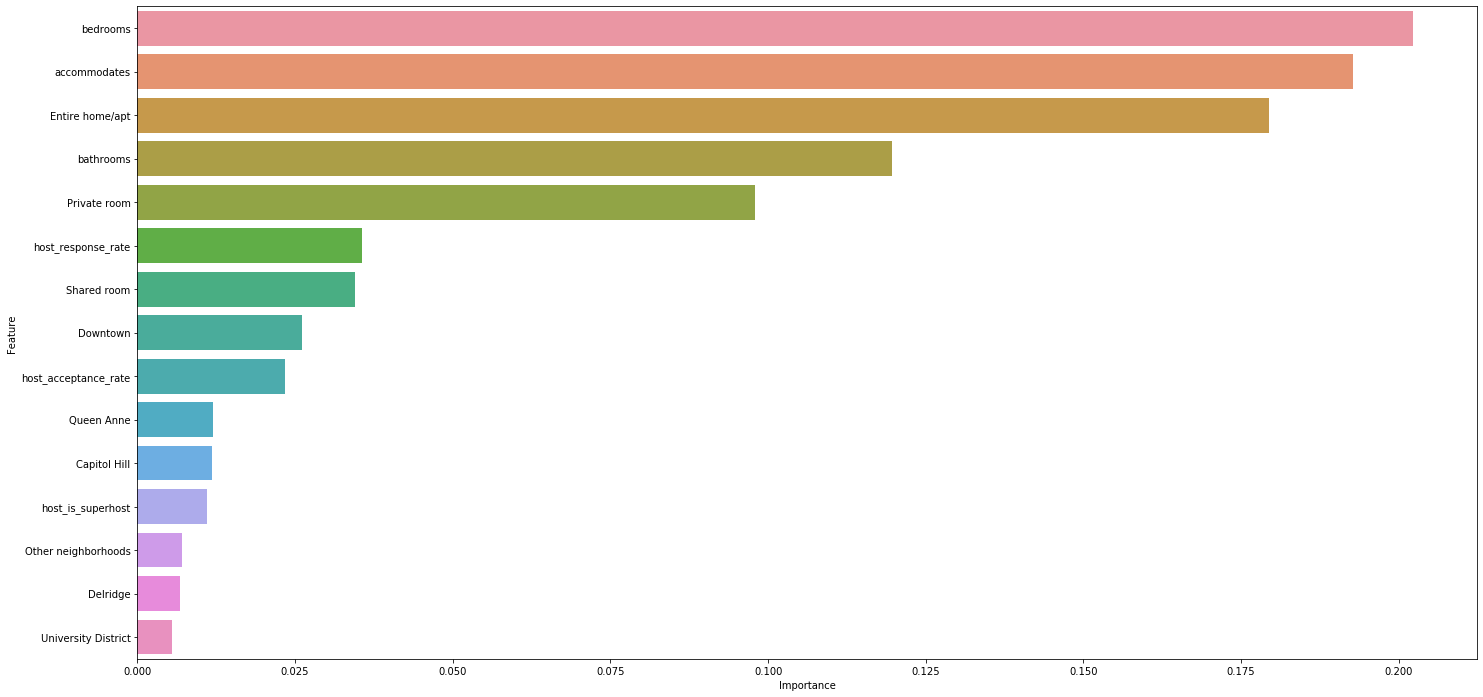

Explained Variance (R^2) on Train Set 	: 0.7744125811937875
Explained Variance (R^2) on Test Set 	: 0.6700701079424934


In [24]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':rf.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", rf.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", rf.score(x_test, y_test))

# Gradient Boosting Regressor


In [25]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error


gbr = GradientBoostingRegressor(min_samples_split=400,
                                min_samples_leaf=50,
                                subsample=0.8,
                                random_state=1,
                               learning_rate=0.01,
                               max_features='sqrt')
param_grid = dict(n_estimators=[6000,7000], max_depth=[2,4,6])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=2)

grid_gbr.fit(x_train,y_train)

gbr = grid_gbr.best_estimator_

y_test_pred = gbr.predict(x_test)
y_train_pred = gbr.predict(x_train)

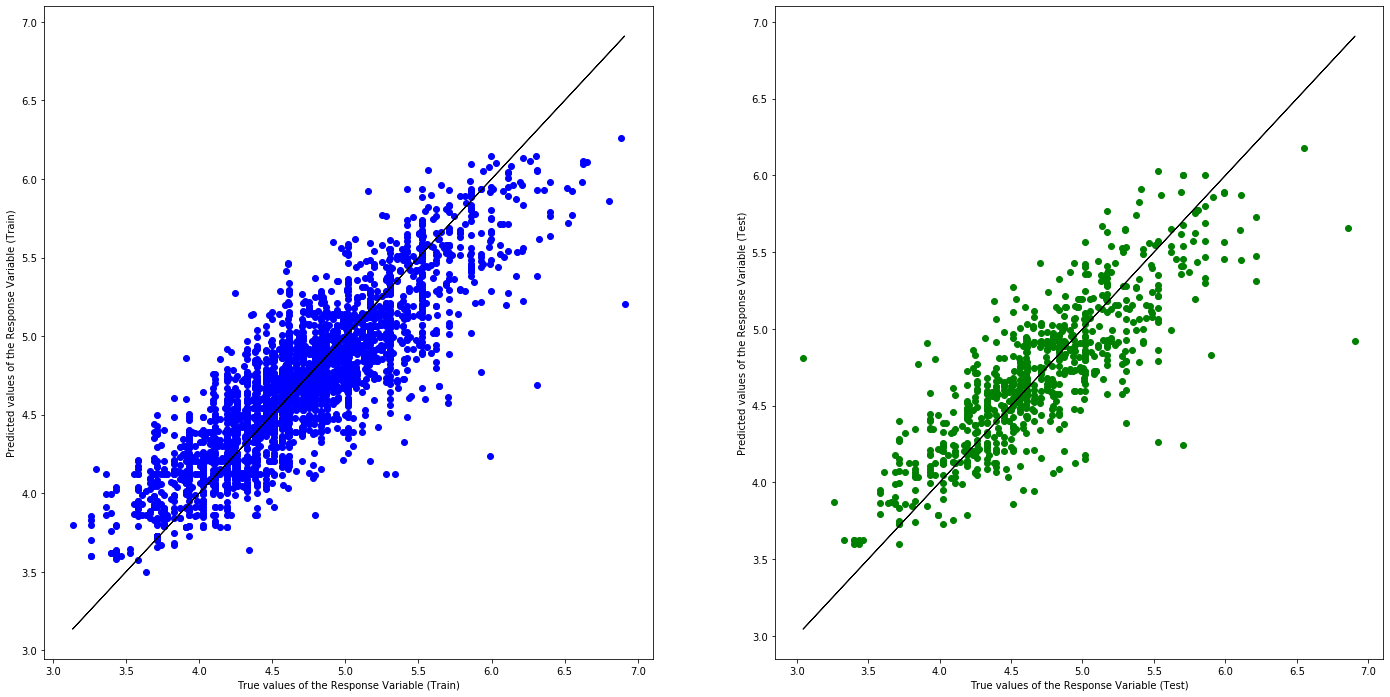

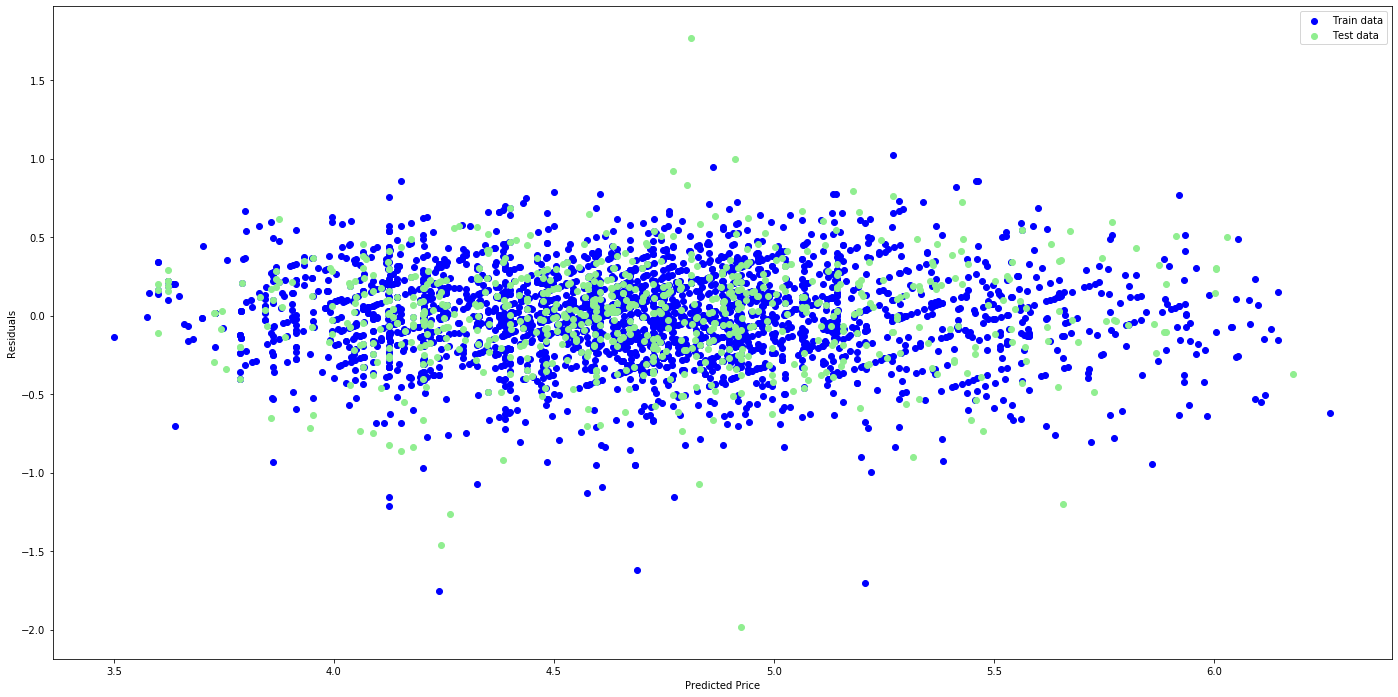

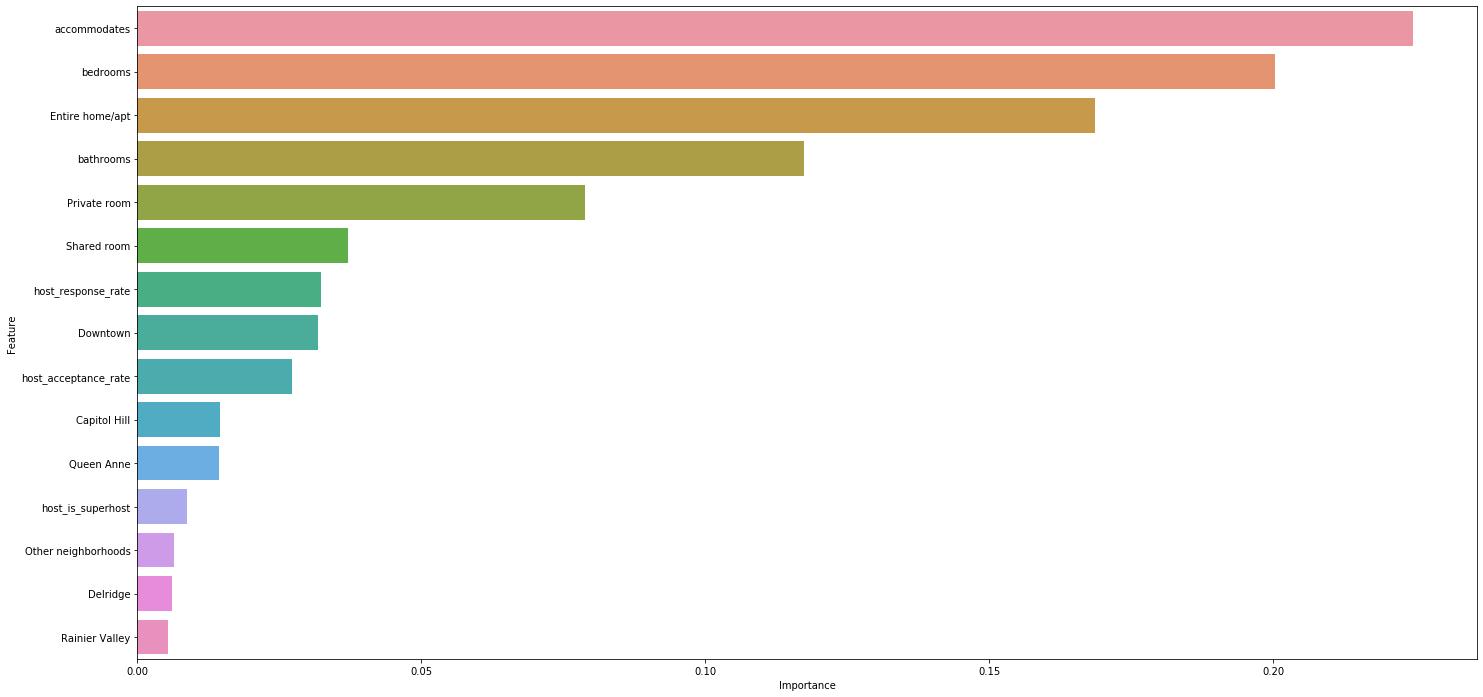

Explained Variance (R^2) on Train Set 	: 0.7381072156695767
Explained Variance (R^2) on Test Set 	: 0.6795272522301838


In [35]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':gbr.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", gbr.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", gbr.score(x_test, y_test))

In [36]:
import nltk
import string

data = pd.read_csv("data/reviews.csv")
comments = data['comments'].astype(str)

In [37]:
CONTRACTION_MAP = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
}

In [38]:
#Pre-Processing of Text 

#Expanding Contractions
import re
contractions_re = re.compile('(%s)' % '|'.join(CONTRACTION_MAP.keys()))
def expand_contractions(s, CONTRACTION_MAP=CONTRACTION_MAP):
    def replace(match):
         return CONTRACTION_MAP[match.group(0)]
    return contractions_re.sub(replace, s)

#Lower case
comments = comments.apply(lambda x: x.lower())

#Expanding Contractions
comments = comments.apply(expand_contractions)

#remove punctuation
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

#remove numbers
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.digits)))


#remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
comments = comments.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [39]:
#Lemmazation with POS tagging

from nltk.corpus import wordnet
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV


lemma_function = WordNetLemmatizer()

def sentence_Lemmazation(sentence):
    tokens = word_tokenize(sentence)
    res_words = []
    for token, tag in pos_tag(tokens):
            res_words.append(lemma_function.lemmatize(token, tag_map[tag[0]]))
    return  " ".join(res_words)


comments = comments.apply(sentence_Lemmazation)  

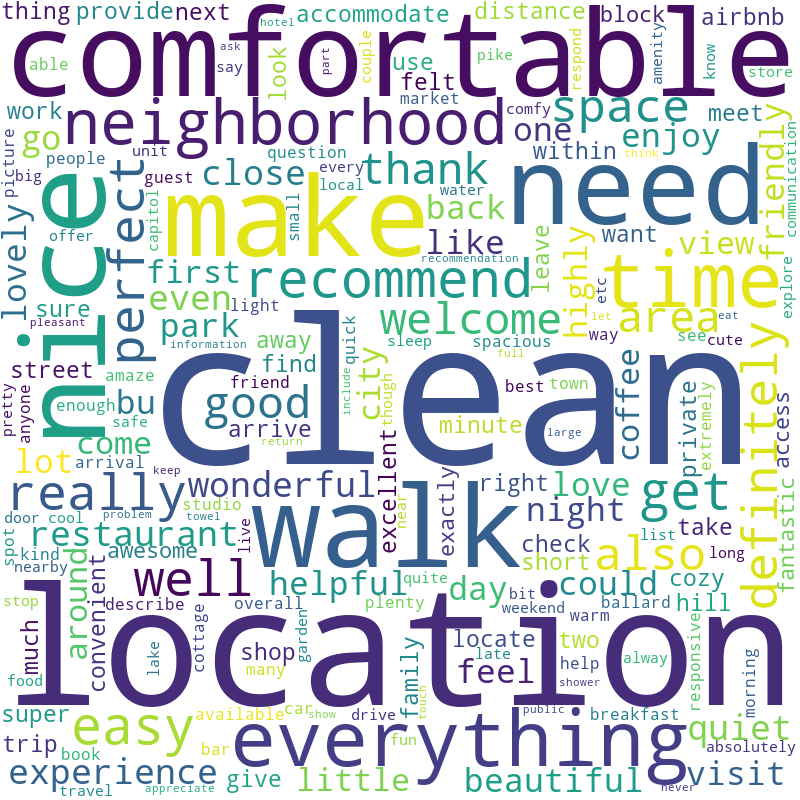

In [40]:
from wordcloud import WordCloud
# Display the generated image:
stop_words = ['seattle','downtown','bedroom','room',
              'kitchen','home','bed','house','apartment','bathroom','great','stay','place','us','would','host']
wordcloud = WordCloud(background_color="white",
                          width=800, height=800,
                          stopwords = stop_words,
                          collocations = False,
                         ).generate(' '.join(comments))
wordcloud.to_image()